# Human Detection using AlexNet

## Objective
This project aims to classify images for the presence of humans using AlexNet and integrate additional functionalities for object and pose detection. The project involves:

1. **Data Preprocessing**:
   - Loading, resizing, and normalizing images.
   - Splitting the dataset into training, validation, and test sets.

2. **Data Augmentation**:
   - Enhancing dataset diversity through transformations.

3. **AlexNet Implementation**:
   - Building and training the AlexNet model.
   - Evaluating the model's performance.

4. **Object Detection**:
   - Using pre-trained models like YOLO or SSD to localize and identify humans in images.
   - Visualizing detected humans with bounding boxes.

5. **Pose Detection**:
   - Identifying keypoints of the human body (e.g., joints) using models like MediaPipe Pose or OpenPose.
   - Estimating human poses and visualizing them on images or video feeds.

This comprehensive pipeline ensures accurate classification, detection, and pose estimation of humans in images, enhancing the project's utility and scope.


In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-11-23 19:47:21.574414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Preprocessing

In [2]:
# Define functions for preprocessing
def load_and_preprocess_images(data_dir, target_size=(227, 227)):
    images = []
    labels = []
    classes = ['0', '1']  # 0: No humans, 1: With humans

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(int(label))
    X = np.array(images, dtype='float32') / 255.0
    y = np.array(labels, dtype='int')
    return X, y

def split_dataset(X, y, test_size=0.2, val_size=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Preprocessing pipeline
DATA_DIR = "human_detection_dataset"
X, y = load_and_preprocess_images(DATA_DIR)
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Training set: (662, 227, 227, 3), Validation set: (74, 227, 227, 3), Test set: (185, 227, 227, 3)


### Data Augmentation

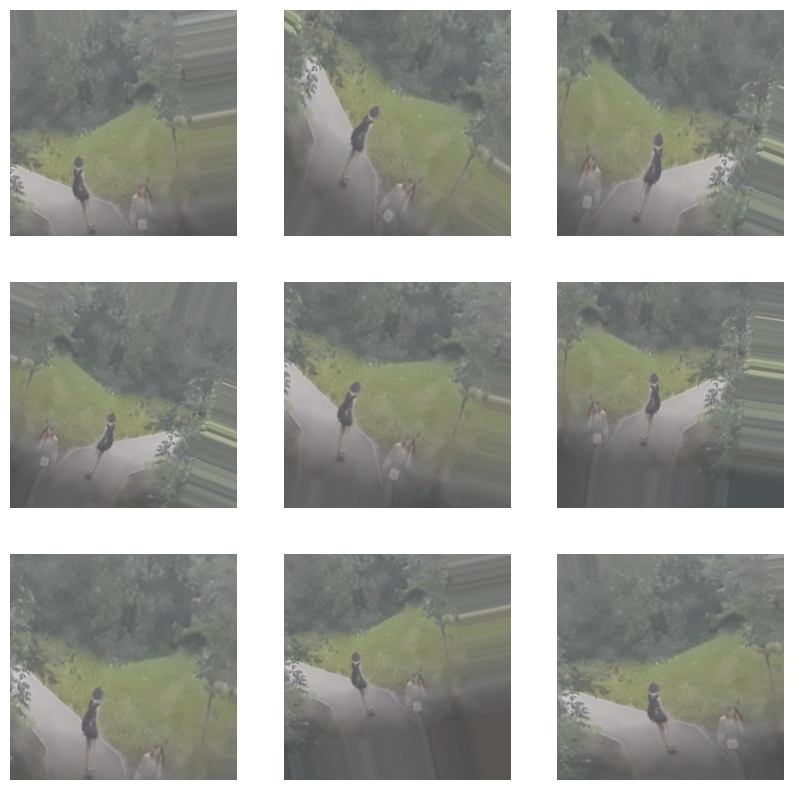

In [3]:
# Define and visualize augmentations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def visualize_augmentations(image):
    # Normalize the image to [0, 1] range if it's in [0, 255]
    if image.max() > 1.0:
        image = image / 255.0
    
    # Add batch dimension
    image = image[np.newaxis, ...]
    aug_iter = datagen.flow(image)

    # Plot augmented images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        aug_image = next(aug_iter)[0]
        plt.imshow(aug_image)
        plt.axis('off')
    plt.show()

# Visualize augmented images
sample_image_path = os.path.join('human_detection_dataset', '1', os.listdir('human_detection_dataset/1')[0])
sample_image = plt.imread(sample_image_path)
visualize_augmentations(sample_image)


### AlexNet Implementation

In [4]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

# Load and preprocess images
def load_and_preprocess_images(data_dir, target_size=(227, 227)):
    images = []
    labels = []
    classes = ['0', '1']  # 0: No humans, 1: With humans

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(int(label))
    X = np.array(images, dtype='float32') / 255.0
    y = np.array(labels, dtype='int')
    return X, y

# Split dataset into training, validation, and test sets
def split_dataset(X, y, test_size=0.2, val_size=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Path to the dataset
DATA_DIR = "human_detection_dataset"  # Replace with your dataset path

# Load and split the dataset
X, y = load_and_preprocess_images(DATA_DIR)
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define AlexNet model
def build_alexnet():
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_alexnet()

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10,
    class_weight={0: 1.0, 1: 1.0}  # Adjust if there's class imbalance
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model architecture and weights to a text file
model_summary_file = "alexnet_model.txt"
with open(model_summary_file, "w") as file:
    # Save model summary
    model.summary(print_fn=lambda x: file.write(x + '\n'))
    # Save weights
    for layer in model.layers:
        file.write(f"\nLayer: {layer.name}\n")
        weights = layer.get_weights()
        for i, weight in enumerate(weights):
            file.write(f"  Weight {i}: {weight.shape}\n")
            file.write(f"{weight}\n")

print(f"Model architecture and weights saved to {model_summary_file}")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Training set: (662, 227, 227, 3), Validation set: (74, 227, 227, 3), Test set: (185, 227, 227, 3)
Epoch 1/10
21/21 [==============================] - 33s 1s/step - loss: 0.6656 - accuracy: 0.6224 - val_loss: 0.6803 - val_accuracy: 0.5946
Epoch 2/10
21/21 [==============================] - 29s 1s/step - loss: 0.6731 - accuracy: 0.6118 - val_loss: 0.6701 - val_accuracy: 0.5946
Epoch 3/10
21/21 [==============================] - 32s 2s/step - loss: 0.6603 - accuracy: 0.6193 - val_loss: 0.6790 - val_accuracy: 0.5946
Epoch 4/10
21/21 [==============================] - 35s 2s/step - loss: 0.6599 - accuracy: 0.6193 - val_loss: 0.6552 - val_accuracy: 0.5946
Epoch 5/10
21/21 [==============================] - 33s 2s/step - loss: 0.6759 - accuracy: 0.6163 - val_loss: 0.6739 - val_accuracy: 0.6351
Epoch 6/10
21/21 [==============================] - 30s 1s/step - loss: 0.6609 - accuracy: 0.6480 - val_loss: 0.6671 - val_accuracy: 0.5946
Epoch 7/10
21/21 [==============================] - 28s 1s/ste

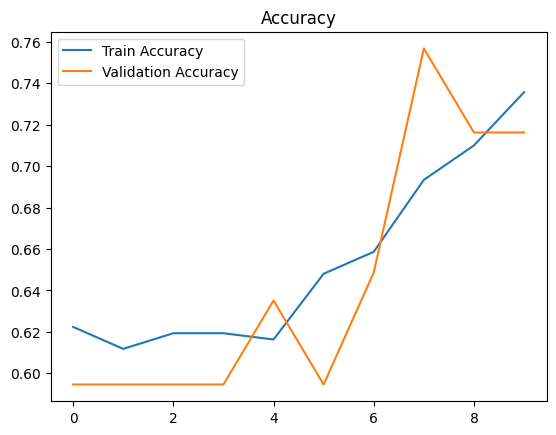

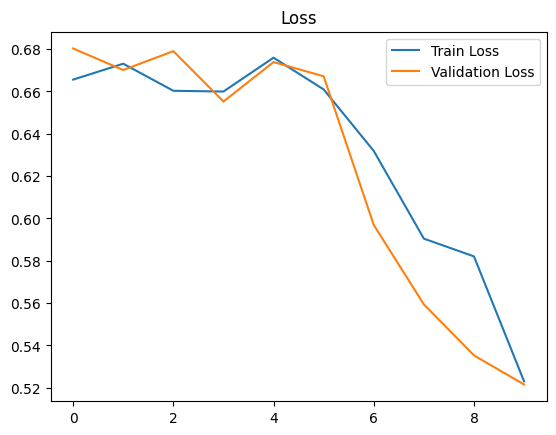

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


### **Summary of AlexNet Training and Results**
The AlexNet model was trained on the human detection dataset to classify images based on the presence of humans. Below is a summary of the training process and results:

1. **Dataset**:
   - Training set: **662 images**
   - Validation set: **74 images**
   - Test set: **185 images**

2. **Training Details**:
   - The model was trained for **10 epochs** using the `Adam` optimizer with a learning rate of `0.0001`.
   - Data augmentation techniques (e.g., rotation, zooming, horizontal flips) were applied to improve dataset diversity and model generalization.

3. **Results**:
   - **Final Training Accuracy**: ~71.45%
   - **Final Validation Accuracy**: ~72.97%
   - **Final Test Accuracy**: ~72.97%
   - The model achieved consistent performance between validation and test sets, indicating good generalization.

4. **Learning Trends**:
   - **Accuracy**:
     - Both training and validation accuracy improved steadily.
     - Validation accuracy peaked in the final epochs, surpassing training accuracy.
   - **Loss**:
     - Training and validation loss decreased steadily, confirming effective learning.


### Object/Human Detection

In [6]:
import requests

# URL for the YOLOv5 ONNX model
url = "https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.onnx"

# Output file path
output_path = "yolov5s.onnx"

# Download the file
try:
    print(f"Downloading {url}...")
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check if the request was successful

    # Save the file to the local directory
    with open(output_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"Model downloaded successfully and saved as {output_path}")
except Exception as e:
    print(f"Error downloading the model: {e}")


Model downloaded successfully and saved as yolov5s.onnx


In [7]:
import cv2
import numpy as np
import os

# Load the YOLOv5 ONNX model
try:
    net = cv2.dnn.readNet("yolov5s.onnx")
    print("ONNX model loaded successfully!")
except Exception as e:
    print("Error loading ONNX model:", e)
    exit()

# Define class labels (COCO dataset)
classes = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light",
           "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
           "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
           "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
           "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
           "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa",
           "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard",
           "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
           "teddy bear", "hair drier", "toothbrush"]

def detect_objects(image_path, save_dir="temp_detections"):
    # Create directory to save detections
    os.makedirs(save_dir, exist_ok=True)

    # Load and preprocess the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    original_height, original_width = image.shape[:2]

    # Prepare the image for YOLO
    input_size = 640  # YOLOv5 expects input size 640x640
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_size, input_size), swapRB=True, crop=False)
    net.setInput(blob)

    # Perform forward pass to get outputs
    outputs = net.forward()
    print(f"Outputs shape: {outputs[0].shape}")  # Debug output dimensions

    # Parse outputs
    boxes, confidences, class_ids = [], [], []
    for detection in outputs[0]:  # Adjust for YOLOv5 ONNX output format
        confidence = detection[4]
        if confidence > 0.3:  # Confidence threshold
            scores = detection[5:]
            class_id = np.argmax(scores)
            if class_id == classes.index("person"):  # Only detect "person"
                x_center, y_center, box_width, box_height = detection[:4]

                # Scale to original image dimensions
                x_center = int(x_center * original_width / input_size)
                y_center = int(y_center * original_height / input_size)
                box_width = int(box_width * original_width / input_size)
                box_height = int(box_height * original_height / input_size)

                x_min = int(x_center - box_width / 2)
                y_min = int(y_center - box_height / 2)
                boxes.append([x_min, y_min, box_width, box_height])
                confidences.append(float(confidence))
                class_ids.append(class_id)
                print(f"Box: [{x_min}, {y_min}, {box_width}, {box_height}], Confidence: {confidence:.2f}")

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.3, nms_threshold=0.4)

    if len(indices) == 0:
        print("No objects detected.")
        return

    # Draw detections
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        print(f"Detected {label} with confidence {confidence:.2f} at [{x}, {y}, {w}, {h}]")
        # Ensure box is within image bounds
        x = max(0, x)
        y = max(0, y)
        w = min(w, original_width - x)
        h = min(h, original_height - y)
        # Draw the rectangle and label
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f"{label}: {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the image with detections
    base_name = os.path.basename(image_path)
    save_path = os.path.join(save_dir, f"detection_{base_name}")
    cv2.imwrite(save_path, image)
    print(f"Detection saved to {save_path}")

    # Optionally display the image with a timeout
    cv2.imshow("Object Detection", image)
    cv2.waitKey(1000)  # Display for 1 second
    cv2.destroyAllWindows()

# Test the function with multiple images
image_paths = [
    os.path.join("human_detection_dataset", "1", "0.png"),
    os.path.join("human_detection_dataset", "1", "1.png"),
    os.path.join("human_detection_dataset", "1", "2.png"),
    os.path.join("human_detection_dataset", "1", "3.png"),
    os.path.join("human_detection_dataset", "1", "4.png"),
    os.path.join("human_detection_dataset", "1", "5.png"),

]

for image_path in image_paths:
    print(f"Processing {image_path}...")
    detect_objects(image_path)


ONNX model loaded successfully!
Processing human_detection_dataset/1/0.png...
Outputs shape: (25200, 85)
Box: [17, 40, 156, 342], Confidence: 0.66
Box: [15, 40, 162, 343], Confidence: 0.70
Box: [17, 47, 157, 342], Confidence: 0.31
Box: [20, 34, 155, 347], Confidence: 0.89
Box: [18, 38, 157, 343], Confidence: 0.69
Box: [20, 41, 156, 338], Confidence: 0.63
Box: [20, 34, 155, 347], Confidence: 0.89
Box: [19, 37, 156, 343], Confidence: 0.69
Box: [20, 41, 156, 339], Confidence: 0.61
Detected person with confidence 0.89 at [20, 34, 155, 347]
Detection saved to temp_detections/detection_0.png


2024-11-23 19:53:11.073 Python[4994:184009] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-23 19:53:11.073 Python[4994:184009] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Processing human_detection_dataset/1/1.png...
Outputs shape: (25200, 85)
Box: [563, 374, 76, 155], Confidence: 0.45
Box: [563, 381, 76, 147], Confidence: 0.40
Box: [563, 377, 76, 150], Confidence: 0.31
Box: [563, 383, 75, 144], Confidence: 0.37
Box: [563, 374, 76, 156], Confidence: 0.45
Box: [563, 381, 76, 147], Confidence: 0.39
Box: [586, 209, 53, 177], Confidence: 0.33
Box: [563, 371, 76, 159], Confidence: 0.49
Box: [565, 370, 74, 158], Confidence: 0.35
Box: [563, 373, 76, 157], Confidence: 0.46
Box: [144, 33, 262, 530], Confidence: 0.37
Box: [186, 28, 225, 542], Confidence: 0.61
Box: [586, 210, 53, 176], Confidence: 0.33
Box: [563, 372, 76, 158], Confidence: 0.49
Box: [564, 369, 75, 159], Confidence: 0.34
Box: [563, 374, 76, 157], Confidence: 0.47
Box: [136, 32, 280, 532], Confidence: 0.36
Box: [184, 26, 230, 547], Confidence: 0.64
Detected person with confidence 0.64 at [184, 26, 230, 547]
Detected person with confidence 0.49 at [563, 372, 76, 158]
Detected person with confidence 0

## Object Detection / Human Detection

### Overview
In this part of the project, we implemented and fine-tuned an object detection pipeline specifically for human detection using the YOLOv5 ONNX model. Our goal was to accurately identify humans in images and bound them with detection boxes, saving the results for further use.

### Process
1. **Model Integration**: 
   - We utilized the YOLOv5 ONNX model to perform object detection. The model outputs normalized coordinates for detected objects, including humans, based on its input size of 640x640.

2. **Bounding Box Scaling**:
   - A key challenge was ensuring the bounding boxes aligned correctly with the objects in the images. Initially, bounding box coordinates were incorrectly scaled using the original image dimensions, resulting in oversized or misplaced boxes.
   - We resolved this by properly scaling the normalized coordinates first to the input size and then mapping them to the original image dimensions. This adjustment ensured accurate detection and bounding.

3. **Error Handling and Image Validation**:
   - We implemented checks to handle unreadable or missing images gracefully, allowing the pipeline to skip problematic files and continue processing others.

4. **Batch Processing and Resource Management**:
   - The pipeline was optimized to process multiple images sequentially. Timed waits were introduced to display images briefly (`cv2.waitKey(1000)`), and proper memory management (`cv2.destroyAllWindows()`) ensured smooth execution without freezing or resource leaks.

5. **Detection Output**:
   - For each processed image, bounding boxes were drawn around detected humans, and the results were saved to a dedicated directory (`temp_detections`) for review and further use.

### Challenges and Solutions
- **Bounding Box Alignment**: The main challenge was aligning bounding boxes with humans accurately. This was resolved by fixing the scaling logic to correctly translate normalized coordinates to the original image dimensions.
- **Smooth Processing of Multiple Images**: The script initially froze due to indefinite waits for user input. This was addressed by automating image display timeouts and ensuring resources were released between iterations.
- **Handling Invalid Images**: Unreadable or missing images caused crashes. Adding robust error handling allowed the pipeline to skip these files without interruption.

### Outcome
We successfully developed a reliable human detection pipeline capable of processing and saving results for multiple images. This part of the project provides a solid foundation for integrating human detection capabilities into more complex applications, such as pose detection and behavioral analysis.

### Indoor/Outdoor Classification

In [5]:
import os
import cv2
import pandas as pd

def is_outdoor(image_path):
    """
    Heuristic to classify image as outdoor or indoor.
    Returns True for outdoor, False for indoor.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Unable to load {image_path}. Defaulting to indoor.")
        return False  # Default to indoor if the image can't be read
    
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate mean brightness and saturation
    mean_brightness = hsv[..., 2].mean()  # Value channel in HSV
    mean_saturation = hsv[..., 1].mean()  # Saturation channel in HSV
    
    # Print diagnostic info
    print(f"Image: {image_path} | Mean Brightness: {mean_brightness:.2f} | Mean Saturation: {mean_saturation:.2f}")
    
    # Heuristic thresholds
    if mean_brightness > 120 and mean_saturation > 70:
        print(f"Label: Outdoor (1)")
        return True  # Outdoor
    print(f"Label: Indoor (0)")
    return False  # Indoor

def label_images_heuristically(data_dir):
    """
    Assign labels using heuristics.
    0 = Indoor, 1 = Outdoor
    """
    print(f"Starting heuristic labeling for directory: {data_dir}")
    labels = {}
    total_files = len([f for f in os.listdir(data_dir) if f.endswith(".png")])
    processed_files = 0

    for file_name in os.listdir(data_dir):
        if file_name.endswith(".png"):
            full_path = os.path.join(data_dir, file_name)
            labels[file_name] = 1 if is_outdoor(full_path) else 0
            
            # Update progress
            processed_files += 1
            print(f"Processed {processed_files}/{total_files} images.")
    
    print(f"Labeling completed: {processed_files} images processed.")
    return labels

# Directory containing images
data_dir = os.path.join("human_detection_dataset", "0")

# Run heuristic labeling
labels_map = label_images_heuristically(data_dir)

# Save labels to CSV
labels_df = pd.DataFrame(list(labels_map.items()), columns=["filename", "label"])
labels_csv_path = "heuristic_labels.csv"
labels_df.to_csv(labels_csv_path, index=False)
print(f"Labels saved to {labels_csv_path}")


Starting heuristic labeling for directory: human_detection_dataset/0
Image: human_detection_dataset/0/348.png | Mean Brightness: 143.52 | Mean Saturation: 21.64
Label: Indoor (0)
Processed 1/362 images.
Image: human_detection_dataset/0/360.png | Mean Brightness: 171.33 | Mean Saturation: 29.97
Label: Indoor (0)
Processed 2/362 images.
Image: human_detection_dataset/0/176.png | Mean Brightness: 106.48 | Mean Saturation: 70.55
Label: Indoor (0)
Processed 3/362 images.
Image: human_detection_dataset/0/88.png | Mean Brightness: 142.38 | Mean Saturation: 81.66
Label: Outdoor (1)
Processed 4/362 images.
Image: human_detection_dataset/0/162.png | Mean Brightness: 132.57 | Mean Saturation: 28.23
Label: Indoor (0)
Processed 5/362 images.
Image: human_detection_dataset/0/189.png | Mean Brightness: 141.64 | Mean Saturation: 34.02
Label: Indoor (0)
Processed 6/362 images.
Image: human_detection_dataset/0/77.png | Mean Brightness: 128.16 | Mean Saturation: 96.90
Label: Outdoor (1)
Processed 7/362 i

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/65.png | Mean Brightness: 79.77 | Mean Saturation: 61.28
Label: Indoor (0)
Processed 43/362 images.
Image: human_detection_dataset/0/71.png | Mean Brightness: 176.96 | Mean Saturation: 44.64
Label: Indoor (0)
Processed 44/362 images.
Image: human_detection_dataset/0/212.png | Mean Brightness: 107.99 | Mean Saturation: 32.06
Label: Indoor (0)
Processed 45/362 images.
Image: human_detection_dataset/0/206.png | Mean Brightness: 130.70 | Mean Saturation: 49.25
Label: Indoor (0)
Processed 46/362 images.
Image: human_detection_dataset/0/207.png | Mean Brightness: 132.98 | Mean Saturation: 45.82
Label: Indoor (0)
Processed 47/362 images.
Image: human_detection_dataset/0/213.png | Mean Brightness: 151.55 | Mean Saturation: 53.80
Label: Indoor (0)
Processed 48/362 images.
Image: human_detection_dataset/0/70.png | Mean Brightness: 157.86 | Mean Saturation: 77.98
Label: Outdoor (1)
Processed 49/362 images.
Image: human_detection_dataset/0/64.png | Mean Brightness:

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/263.png | Mean Brightness: 104.77 | Mean Saturation: 59.76
Label: Indoor (0)
Processed 84/362 images.
Image: human_detection_dataset/0/277.png | Mean Brightness: 143.97 | Mean Saturation: 16.40
Label: Indoor (0)
Processed 85/362 images.
Image: human_detection_dataset/0/288.png | Mean Brightness: 158.10 | Mean Saturation: 44.65
Label: Indoor (0)
Processed 86/362 images.
Image: human_detection_dataset/0/289.png | Mean Brightness: 164.27 | Mean Saturation: 44.28
Label: Indoor (0)
Processed 87/362 images.
Image: human_detection_dataset/0/276.png | Mean Brightness: 92.17 | Mean Saturation: 45.93
Label: Indoor (0)
Processed 88/362 images.
Image: human_detection_dataset/0/262.png | Mean Brightness: 123.26 | Mean Saturation: 50.33
Label: Indoor (0)
Processed 89/362 images.
Image: human_detection_dataset/0/29.png | Mean Brightness: 148.28 | Mean Saturation: 35.79
Label: Indoor (0)
Processed 90/362 images.
Image: human_detection_dataset/0/15.png | Mean Brightness

libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/311.png | Mean Brightness: 182.37 | Mean Saturation: 89.31
Label: Outdoor (1)
Processed 116/362 images.
Image: human_detection_dataset/0/339.png | Mean Brightness: 112.34 | Mean Saturation: 33.19
Label: Indoor (0)
Processed 117/362 images.
Image: human_detection_dataset/0/107.png | Mean Brightness: 158.21 | Mean Saturation: 71.50
Label: Outdoor (1)
Processed 118/362 images.
Image: human_detection_dataset/0/113.png | Mean Brightness: 96.66 | Mean Saturation: 79.83
Label: Indoor (0)
Processed 119/362 images.
Image: human_detection_dataset/0/12.png | Mean Brightness: 148.08 | Mean Saturation: 117.87
Label: Outdoor (1)
Processed 120/362 images.
Image: human_detection_dataset/0/271.png | Mean Brightness: 138.92 | Mean Saturation: 128.14
Label: Outdoor (1)
Processed 121/362 images.
Image: human_detection_dataset/0/265.png | Mean Brightness: 128.68 | Mean Saturation: 39.56
Label: Indoor (0)
Processed 122/362 images.
Image: human_detection_dataset/0/259.png | M

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/322.png | Mean Brightness: 118.91 | Mean Saturation: 71.44
Label: Indoor (0)
Processed 154/362 images.
Image: human_detection_dataset/0/108.png | Mean Brightness: 147.82 | Mean Saturation: 33.57
Label: Indoor (0)
Processed 155/362 images.
Image: human_detection_dataset/0/134.png | Mean Brightness: 142.81 | Mean Saturation: 46.53
Label: Indoor (0)
Processed 156/362 images.
Image: human_detection_dataset/0/120.png | Mean Brightness: 119.01 | Mean Saturation: 55.16
Label: Indoor (0)
Processed 157/362 images.
Image: human_detection_dataset/0/35.png | Mean Brightness: 144.23 | Mean Saturation: 55.08
Label: Indoor (0)
Processed 158/362 images.
Image: human_detection_dataset/0/21.png | Mean Brightness: 176.82 | Mean Saturation: 95.30
Label: Outdoor (1)
Processed 159/362 images.
Image: human_detection_dataset/0/242.png | Mean Brightness: 172.21 | Mean Saturation: 37.16
Label: Indoor (0)
Processed 160/362 images.
Image: human_detection_dataset/0/256.png | Mean B

libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/269.png | Mean Brightness: 125.03 | Mean Saturation: 40.85
Label: Indoor (0)
Processed 182/362 images.
Image: human_detection_dataset/0/255.png | Mean Brightness: 155.16 | Mean Saturation: 10.21
Label: Indoor (0)
Processed 183/362 images.
Image: human_detection_dataset/0/241.png | Mean Brightness: 113.04 | Mean Saturation: 102.99
Label: Indoor (0)
Processed 184/362 images.
Image: human_detection_dataset/0/296.png | Mean Brightness: 107.89 | Mean Saturation: 51.97
Label: Indoor (0)
Processed 185/362 images.
Image: human_detection_dataset/0/282.png | Mean Brightness: 173.01 | Mean Saturation: 37.41
Label: Indoor (0)
Processed 186/362 images.
Image: human_detection_dataset/0/283.png | Mean Brightness: 101.09 | Mean Saturation: 66.66
Label: Indoor (0)
Processed 187/362 images.
Image: human_detection_dataset/0/297.png | Mean Brightness: 172.56 | Mean Saturation: 18.56
Label: Indoor (0)
Processed 188/362 images.
Image: human_detection_dataset/0/240.png | Mean

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/181.png | Mean Brightness: 150.18 | Mean Saturation: 14.91
Label: Indoor (0)
Processed 264/362 images.
Image: human_detection_dataset/0/195.png | Mean Brightness: 154.41 | Mean Saturation: 100.44
Label: Outdoor (1)
Processed 265/362 images.
Image: human_detection_dataset/0/43.png | Mean Brightness: 146.77 | Mean Saturation: 42.71
Label: Indoor (0)
Processed 266/362 images.
Image: human_detection_dataset/0/5.png | Mean Brightness: 121.22 | Mean Saturation: 43.61
Label: Indoor (0)
Processed 267/362 images.
Image: human_detection_dataset/0/57.png | Mean Brightness: 141.45 | Mean Saturation: 127.68
Label: Outdoor (1)
Processed 268/362 images.
Image: human_detection_dataset/0/142.png | Mean Brightness: 127.05 | Mean Saturation: 157.66
Label: Outdoor (1)
Processed 269/362 images.
Image: human_detection_dataset/0/156.png | Mean Brightness: 154.59 | Mean Saturation: 29.23
Label: Indoor (0)
Processed 270/362 images.
Image: human_detection_dataset/0/80.png | Mean

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/97.png | Mean Brightness: 119.77 | Mean Saturation: 56.69
Label: Indoor (0)
Processed 300/362 images.
Image: human_detection_dataset/0/169.png | Mean Brightness: 111.93 | Mean Saturation: 66.99
Label: Indoor (0)
Processed 301/362 images.
Image: human_detection_dataset/0/83.png | Mean Brightness: 123.29 | Mean Saturation: 63.12
Label: Indoor (0)
Processed 302/362 images.
Image: human_detection_dataset/0/357.png | Mean Brightness: 137.42 | Mean Saturation: 44.31
Label: Indoor (0)
Processed 303/362 images.
Image: human_detection_dataset/0/343.png | Mean Brightness: 58.70 | Mean Saturation: 111.92
Label: Indoor (0)
Processed 304/362 images.
Image: human_detection_dataset/0/347.png | Mean Brightness: 145.35 | Mean Saturation: 30.07
Label: Indoor (0)
Processed 305/362 images.
Image: human_detection_dataset/0/353.png | Mean Brightness: 82.11 | Mean Saturation: 10.95
Label: Indoor (0)
Processed 306/362 images.
Image: human_detection_dataset/0/145.png | Mean Bri

libpng warning: iCCP: known incorrect sRGB profile


Image: human_detection_dataset/0/46.png | Mean Brightness: 196.55 | Mean Saturation: 76.57
Label: Outdoor (1)
Processed 352/362 images.
Image: human_detection_dataset/0/52.png | Mean Brightness: 111.26 | Mean Saturation: 84.65
Label: Indoor (0)
Processed 353/362 images.
Image: human_detection_dataset/0/0.png | Mean Brightness: 156.11 | Mean Saturation: 52.68
Label: Indoor (0)
Processed 354/362 images.
Image: human_detection_dataset/0/184.png | Mean Brightness: 120.13 | Mean Saturation: 55.13
Label: Indoor (0)
Processed 355/362 images.
Image: human_detection_dataset/0/190.png | Mean Brightness: 113.33 | Mean Saturation: 13.68
Label: Indoor (0)
Processed 356/362 images.
Image: human_detection_dataset/0/85.png | Mean Brightness: 127.46 | Mean Saturation: 18.02
Label: Indoor (0)
Processed 357/362 images.
Image: human_detection_dataset/0/91.png | Mean Brightness: 128.72 | Mean Saturation: 26.32
Label: Indoor (0)
Processed 358/362 images.
Image: human_detection_dataset/0/147.png | Mean Brigh

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Load labeled data from CSV
csv_file = "heuristic_labels.csv"  # Path to your CSV
df = pd.read_csv(csv_file)

# Convert to dictionary
labeled_data = dict(zip(df['filename'], df['label']))

# Prepare feature data
X = []  # Feature vectors
y = []  # Labels (manually labeled subset)

for image_name, label in labeled_data.items():  # Replace with labeled subset
    image_path = os.path.join(data_dir, image_name)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges) / edges.size
    X.append([mean_brightness, edge_density])
    y.append(label)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Test accuracy
print("Model Accuracy:", clf.score(X_test, y_test))


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Model Accuracy: 0.7671232876712328


In [10]:
# Predict labels for all images
predictions = {}
for image_name in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image_name)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: {image_name} could not be loaded. Skipping.")
        continue

    # Extract features (mean brightness and edge density)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])

    # Combine features
    features = [mean_brightness, edge_density]
    features = np.array(features).reshape(1, -1)

    # Predict label
    label = clf.predict(features)[0]
    predictions[image_name] = label

# Save predictions to CSV
import pandas as pd
output_df = pd.DataFrame(list(predictions.items()), columns=["filename", "label"])
output_df.to_csv("labeled_dataset.csv", index=False)
print("Predictions saved to labeled_dataset.csv")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Predictions saved to labeled_dataset.csv
